## **Eksplorasi Data Peluncuran Roket: Tingkat Keberhasilan, Kegagalan, Tren Tahunan, dan Biaya Peluncuran**


**Pendahuluan:**

Dalam era teknologi dan eksplorasi luar angkasa yang berkembang pesat, memahami dinamika peluncuran roket sangat penting. Dengan mendalami analisis data, kita dapat menggali informasi penting terkait efisiensi, biaya, dan tingkat aktivitas berbagai organisasi dalam industri peluncuran roket.

Dalam analisis ini, kita akan menyelidiki empat aspek utama:

1. **Tingkat Keberhasilan dan Kegagalan Peluncuran Roket:**  
   - Proporsi misi yang berhasil dibandingkan dengan yang gagal dapat menggambarkan efisiensi industri. Tingkat keberhasilan yang lebih tinggi mungkin menunjukkan kemajuan teknologi, persiapan yang lebih baik, atau tim yang lebih berpengalaman. Sebaliknya, memahami alasan di balik kegagalan dapat menunjukkan area yang perlu ditingkatkan dan mitigasi risiko.
     
   
2. **Organisasi Paling Aktif:**  
   - Mengidentifikasi organisasi yang sering meluncurkan roket memberikan wawasan tentang organisasi yang dominan di pasar. Data ini dapat memberi petunjuk tentang organisasi mana yang memimpin dari sisi teknologi, pendanaan, atau kolaborasi global. Frekuensinya juga menetapkan standar untuk organisasi baru dalam hal tingkat aktivitas.

3. **Tren Peluncuran Tahunan:**  
   - Menganalisis tren tahunan memberikan gambaran tentang bagaimana industri peluncuran roket telah berkembang seiring waktu. Tren meningkat mungkin menunjukkan minat yang tumbuh dalam eksplorasi luar angkasa, pendanaan yang meningkat, atau kemajuan teknologi. Di sisi lain, tren menurun dapat menunjukkan jenuhnya pasar, berkurangnya minat, atau faktor eksternal seperti kemunduran ekonomi global yang mempengaruhi peluncuran.

4. **Distribusi Biaya Peluncuran Roket:**  
   - Memahami struktur biaya adalah kunci untuk menilai kelayakan keuangan dari investasi di industri peluncuran roket. Distribusi biaya yang luas mungkin menunjukkan adanya peluncuran dari anggaran rendah, mungkin untuk tujuan akademik atau penelitian, hingga peluncuran dengan anggaran tinggi, mungkin untuk misi yang kompleks atau usaha komersial.

Melalui aspek-aspek ini, kita bertujuan untuk memberikan pemahaman mendalam tentang dinamika industri peluncuran roket saat ini. Wawasan semacam itu sangat berharga bagi investor, peneliti, pembuat kebijakan, dan pemangku kepentingan lainnya.

### **1. Memuat Data**
Pada bagian ini, kita menggunakan pustaka `pandas` untuk memuat dataset dari file CSV ke dalam sebuah DataFrame. Dataset berisi informasi tentang peluncuran roket. Setelah memuat, kita menampilkan lima baris pertama dari dataset untuk mendapatkan gambaran awal dari data yang dimiliki.

In [30]:
import pandas as pd

# Memuat data dari CSV ke DataFrame
data = pd.read_csv('C:/Users/User/Documents/Portofolio/Space+Missions+(start)/mission_launches.csv')

# Menampilkan 5 baris pertama dari data
data.head()


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


### **2. Pra-pemrosesan Data**
Di bagian ini, kita melakukan beberapa langkah untuk membersihkan data
- Menghapus kolom yang tidak diperlukan, yaitu kolom `unnamed: 0` dan `unnamed: 0.1`.
- Mengubah format kolom `Date` menjadi tipe data `datetime` agar lebih mudah diproses di langkah selanjutnya.
- Menampilkan lima baris pertama dari data yang telah dibersihkan untuk memastikan perubahan telah diterapkan dengan benar.

In [27]:
# Menghapus kolom yang tidak diperlukan
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

# Mengubah kolom Date menjadi tipe data datetime
data['Date'] = pd.to_datetime(data['Date'])

# Menampilkan 5 baris pertama dari data yang telah dibersihkan
data.head()


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success


### **3. Analisis Status Peluncuran Roket**

Pada bagian ini, kita menganalisis distribusi peluncuran roket berdasarkan status misinya. Menggunakan fungsi `value_counts()`, kita menghitung jumlah peluncuran untuk setiap status misi yang ada di dataset. Hasilnya akan menunjukkan berapa banyak misi yang berhasil, gagal, atau memiliki status lain.

In [3]:
# Menghitung jumlah peluncuran berdasarkan status misinya
mission_status_counts = data['Mission_Status'].value_counts()

mission_status_counts

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

#### **Visualisasi Status Peluncuran**

Di bagian ini, kita memvisualisasikan data yang telah dianalisis pada langkah sebelumnya. Dengan menggunakan pustaka `matplotlib`, kita membuat barchart untuk menampilkan jumlah peluncuran berdasarkan status misinya.

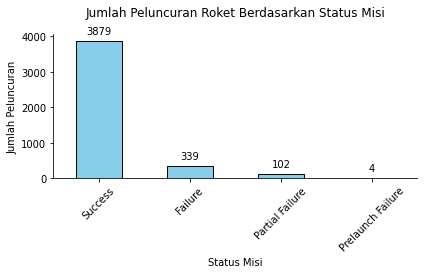

In [18]:
import matplotlib.pyplot as plt

# Menambahkan ruang di antara plot dan judul
ax = mission_status_counts.plot(kind='bar', color='skyblue', edgecolor='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title("Jumlah Peluncuran Roket Berdasarkan Status Misi", y=1.08)  # Menyesuaikan posisi judul
plt.xlabel("Status Misi")
plt.ylabel("Jumlah Peluncuran")
plt.xticks(rotation=45)

# Menambahkan nilai asli di atas setiap batang
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


Barchart di atas menunjukkan jumlah peluncuran roket berdasarkan status misinya. Berikut interpretasi dari barchart di atas:

1. **Sukses (Success):** Dengan 3879 peluncuran, ini adalah status yang paling banyak ditemui. Ini menunjukkan bahwa sebagian besar misi peluncuran roket berhasil mencapai tujuannya tanpa adanya masalah. 

2. **Gagal (Failure):** Terdapat 339 misi yang gagal. Meskipun jumlahnya jauh lebih sedikit dibandingkan dengan misi yang sukses, tetap saja ini menunjukkan adanya risiko dalam peluncuran roket.

3. **Gagal Sebagian (Partial Failure):** Ada 102 misi yang mengalami kegagalan sebagian. Ini berarti misi tersebut mungkin telah mencapai sebagian dari tujuannya, tetapi tidak sepenuhnya sesuai dengan yang diharapkan.

4. **Gagal Sebelum Peluncuran (Prelaunch Failure):** Hanya ada 4 misi yang gagal sebelum peluncuran. Ini menunjukkan bahwa insiden semacam ini sangat jarang terjadi, tetapi tetap saja penting untuk diwaspadai.

Kesimpulannya, meskipun sebagian besar misi peluncuran roket berhasil, tetap ada sejumlah misi yang mengalami kegagalan, baik itu kegagalan total, kegagalan sebagian, atau bahkan kegagalan sebelum peluncuran. Hal ini mengingatkan kita tentang kompleksitas dan tantangan yang ada dalam industri penerbangan luar angkasa.

### **4. Analisis Jumlah Peluncuran Roket Berdasarkan Organisasi**

Dalam analisis ini, kita menyelidiki organisasi-organisasi mana saja yang paling aktif dalam meluncurkan roket. Menggunakan fungsi `value_counts()`, kita menghitung jumlah peluncuran untuk setiap organisasi yang terdaftar dalam dataset. Hasilnya menunjukkan organisasi-organisasi dengan aktivitas peluncuran roket terbanyak.

In [6]:
# Menghitung jumlah peluncuran roket berdasarkan organisasinya
organisation_counts = data['Organisation'].value_counts()

# Menampilkan 10 organisasi dengan jumlah peluncuran terbanyak
top_organisations = organisation_counts.head(10)

top_organisations


RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: Organisation, dtype: int64

#### **Visualisasi Jumlah Peluncuran Berdasarkan Organisasi**

Dalam visualisasi ini, kita memanfaatkan pustaka matplotlib untuk membuat grafik batang yang menampilkan 10 organisasi dengan jumlah peluncuran roket terbanyak. Grafik ini memberikan gambaran visual mengenai dominasi beberapa organisasi dalam industri peluncuran roket.

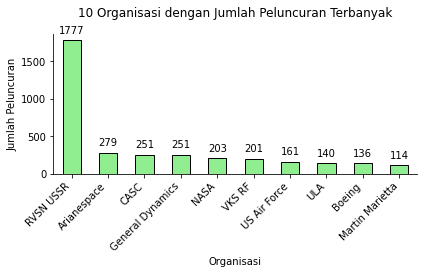

In [21]:
# Membuat bar chart untuk 10 organisasi dengan jumlah peluncuran terbanyak
ax2 = top_organisations.plot(kind='bar', color='lightgreen', edgecolor='black')
ax2.spines['top'].set_visible(False)  # Menghilangkan garis atas
ax2.spines['right'].set_visible(False)  # Menghilangkan garis kanan

plt.title("10 Organisasi dengan Jumlah Peluncuran Terbanyak", y=1.08)  # Menambahkan ruang di antara plot dan judul
plt.xlabel("Organisasi")
plt.ylabel("Jumlah Peluncuran")
plt.xticks(rotation=45, ha='right')

# Menambahkan nilai asli di atas setiap batang
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


**Interpretasi Grafik:**
- **RVSN USSR** merupakan organisasi dengan jumlah peluncuran roket terbanyak, dengan lebih dari 1700 peluncuran. Ini menunjukkan dominasi organisasi ini dalam industri peluncuran roket, mungkin karena peranannya yang penting selama periode tertentu dalam sejarah.
- **Arianespace** berada di urutan kedua, dengan lebih dari 250 peluncuran. Meskipun jauh di bawah RVSN USSR dalam hal jumlah, organisasi ini tetap menjadi organisasi penting dalam industri ini.
- **CASC** dan **General Dynamics** menempati urutan ketiga dab keempat dengan 251 peluncuran. Ini menunjukkan pertumbuhan dan kehadiran kuat dari organisasi ini dalam dunia peluncuran roket.
- Organisasi lain seperti **VKS RF** dan **NASA** juga menunjukkan aktivitas yang signifikan dalam industri ini, dengan lebih dari 200 peluncuran masing-masing.
- Ada perbedaan yang signifikan antara jumlah peluncuran roket **RVSN USSR** dengan organisasi lainnya, menunjukkan dominasi yang kuat dari **RVSN USSR** selama periode operasionalnya.

Dari grafik ini, kita dapat mengambil kesimpulan bahwa beberapa organisasi memiliki peran dominan dalam sejarah peluncuran roket, baik karena sejarah, teknologi, atau kebijakan tertentu yang mereka miliki.

### **5. Analisis Time-Series Jumlah Peluncuran Roket Setiap Tahun**

Dalam analisis ini, kita ingin mengetahui bagaimana tren peluncuran roket berubah sepanjang waktu, khususnya setiap tahun. Dengan mengelompokkan data berdasarkan tahun dari tanggal peluncuran, kita dapat menghitung berapa kali roket diluncurkan setiap tahunnya. kita menggunakan time series untuk menampilkan tren jumlah peluncuran roket setiap tahun. Time series memberikan gambaran yang jelas tentang bagaimana tren tersebut berubah dari tahun ke tahun.

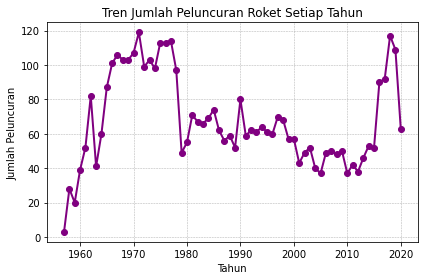

In [23]:
# Menghilangkan informasi zona waktu dengan cara lain
data['Date'] = data['Date'].apply(lambda x: x.replace(tzinfo=None))

# Menghitung jumlah peluncuran roket setiap tahun
yearly_launches = data.groupby(data['Date'].dt.year)['Date'].count()

# Membuat line chart untuk tren jumlah peluncuran roket setiap tahun
yearly_launches.plot(kind='line', color='purple', marker='o', linewidth=2)
plt.title("Tren Jumlah Peluncuran Roket Setiap Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Peluncuran")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#### **Interpretasi Grafik**
- Secara keseluruhan, tampaknya ada peningkatan signifikan dalam jumlah peluncuran roket dari tahun 1960-an hingga sekitar pertengahan 1970-an, mencapai puncaknya pada pertengahan hingga akhir 1970-an.
- Setelah mencapai puncak di akhir 1970-an, ada penurunan dalam jumlah peluncuran roket yang berlanjut hingga sekitar awal 2000-an.
- Mulai dari pertengahan 2000-an, tampaknya ada kecenderungan stabil dalam jumlah peluncuran roket setiap tahun dengan beberapa fluktuasi.
- Terakhir, dalam beberapa tahun terakhir yang ada dalam dataset, tampaknya ada peningkatan kembali dalam jumlah peluncuran roket. Akan tetapi, pada tahun-tahun dimana pandemi Covid-19 muncul, terjadi penurunan yang signifikan setelah adanya peningkatan di tahun 2015-2018.

Dari grafik ini, kita dapat mengambil kesimpulan bahwa ada periode-periode tertentu dalam sejarah peluncuran roket di mana aktivitas tersebut menjadi sangat intensif, diikuti oleh periode penurunan aktivitas. Faktor-faktor seperti perkembangan teknologi, kebijakan pemerintah, dinamika geopolitik, dan dampak dari pandemi yang terjadi mungkin berperan dalam mempengaruhi tren-tren ini.

### **6. Analisis Distribusi Harga Peluncuran Roket**

In [24]:
# Analisis statistik deskriptif untuk kolom harga
price_description = data['Price'].describe()

price_description


count       964
unique       56
top       450.0
freq        136
Name: Price, dtype: object

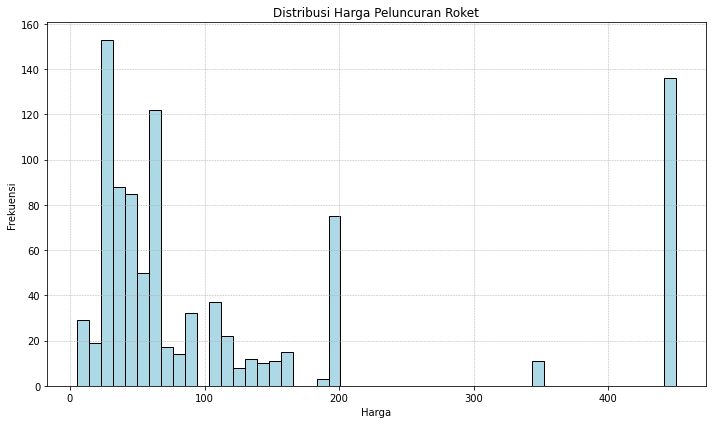

In [25]:
# Mengonversi kolom 'Price' menjadi tipe data numerik
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Membuat histogram untuk distribusi harga
plt.figure(figsize=(10, 6))
plt.hist(data['Price'].dropna(), bins=50, color='lightblue', edgecolor='black')
plt.title("Distribusi Harga Peluncuran Roket")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Dari histogram yang ditampilkan, kita dapat membuat interpretasi:
- **Konsentrasi Harga**: Sebagian besar peluncuran roket memiliki harga di kisaran rendah hingga menengah, dengan beberapa puncak yang jelas di beberapa titik harga tertentu.
- **Harga Tertinggi**: Ada beberapa peluncuran dengan harga yang sangat tinggi, namun frekuensinya rendah jika dibandingkan dengan harga peluncuran menengah ke bawah. Ini menunjukkan bahwa peluncuran dengan biaya tinggi mungkin merupakan misi khusus atau menggunakan teknologi yang lebih mahal.
- **Sebaran**: Sebaran harga tampaknya tidak simetris, dengan kemiringan ke kanan. Ini menunjukkan bahwa sebagian besar peluncuran cenderung memiliki harga yang lebih rendah dengan beberapa pengecualian yang memiliki harga lebih tinggi.
- **Modus**: Frekuensi tinggi di sekitar harga 450.0.

Dengan demikian, kita dapat menyimpulkan bahwa meskipun ada beberapa peluncuran roket dengan biaya yang sangat tinggi, sebagian besar peluncuran roket memiliki biaya yang relatif lebih rendah hingga menengah.